# <font color='dark'>Seleção e agrupamento de dados com Pandas</font>

1. Conhecendo os dados
2. Agrupamento de dados  
  2.1 Transformando os dados entre _wide_ e _long_ com `melt()`  
  2.2 Agrupando os dados com `groupby()`  
3. Agrupamentos multi-index  
  3.1 Níveis de informação do índice  
  3.2 Selecionando dados com método _cross_section_ `xs()`  
  3.3 Obtendo maiores valores com `max()` e seus índices com `idxmax()`  
  3.4 Transformando os dados entre _long_ e _wide_ com `pivot_table()`  
4. Unindo DataFrames com `merge()`

## 1 Conhecendo os dados

> Vamos analisar dados de emissões de gases de efeito estufa no território brasileiro, criando tabelas e visualizações para entender os dados e gerar insights a partir deles.  
Os [dados](https://caelum-online-public.s3.amazonaws.com/2927-pandas-selecao-agrupamento-dados/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx) foram extraídos do [SEEG](https://seeg.eco.br/) (Sistema de Estimativa de Emissões e Remoções de Gases de Efeito Estufa, Observatório do Clima) e dizem respeito a quantidades e fontes de emissão de gases por estado.

### Leitura dos dados

In [ ]:
import pandas as pd

In [ ]:
pd.ExcelFile('/content/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx').sheet_names # paginas existentes na planilha

['LEIA ANTES',
 'HISTÓRICO DE VERSOES',
 'GEE Brasil',
 'GEE Estados',
 'CONSULTA BRASIL',
 'CONSULTA ESTADOS',
 'CONSULTA ATIV ECONOMICA',
 'Arvore Hierarquica',
 'GWP e GTP',
 'Gases Por Setor',
 'Estados',
 'Atividade Economica',
 'Produto']

In [ ]:
df = pd.read_excel('/content/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name='GEE Estados') # carrega dados da pagina de intesse
print(df.shape)
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


(103312, 63)


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


In [ ]:
df.iloc[:,:15].info() # info das primeiras 15 colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

In [ ]:
df.iloc[:,-5:].info() # info das ultimas 5 colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   2017    103312 non-null  float64
 1   2018    103312 non-null  float64
 2   2019    103312 non-null  float64
 3   2020    103312 non-null  float64
 4   2021    103312 non-null  float64
dtypes: float64(5)
memory usage: 3.9 MB


### Ajustando a base de dados

Estamos interessados somente na **emissão de gases gerados pelos estados que estejam no inventário nacional**, portanto vamos identificar os tipos de dados únicos da coluna `Emissão / Remoção / Bunker`.

In [ ]:
df['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

- `'Remoção'`: retirada dos gases estufa, que é o contrário da emissão
- `'NCI'`: são dados não contemplados no inventário nacional
- `'Bunker'`: emissões de transporte marítimo e aéreo internacional, portanto, não são emissões diretas dos estados.

Vamos checar primeiro os dados de **_remoção_**, para identificar se todos eles realmente correspondem a retirada de gases estufa. Para isso, devemos esperar observar apenas quantidades negativas nas colunas que trazem a quantidade de gases emitidos em cada ano.

In [ ]:
# quantidade de linhas que satisfaz a condicao
((df['Emissão / Remoção / Bunker'] == 'Remoção NCI') | (df['Emissão / Remoção / Bunker'] == 'Remoção')).sum()

7970

In [ ]:
df_remocao = df[df['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção'])] # outra forma de selecionar linhas
df_remocao.shape

(7970, 63)

In [ ]:
df_remocao.loc[:,1970:2021].head() # seleciona apenas colunas com quantidades de emissoes em cada ano

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


Para identificar se todos os valores são negativos, vamos utilizar a função `max()` na seleção acima, para checar se tem algum valor maior do que 0. Podemos ainda aplicar a `max()` na _series_ resultando do primeiro `max()`.

In [ ]:
(df_remocao.loc[:,1970:2021].max()).max()

0.0

Vamos também identificar se algum valor do tipo **_Bunker_** está "incorreto", ou seja, se a emissão corresponde a algum estado.

In [ ]:
df.loc[df['Emissão / Remoção / Bunker'] == 'Bunker', 'Estado'].unique() # resultado: nao ha estados associados a emissoes desse tipo

array([nan], dtype=object)

Agora selecionamos apenas as linhas correspondentes a `'Emissão'`, e como não restou nenhum valor útil para análise na coluna de `Emissão / Remoção / Bunker`, vamos removê-la da base de dados.

In [ ]:
df = df.loc[df['Emissão / Remoção / Bunker'] == 'Emissão', df.columns != 'Emissão / Remoção / Bunker']
df.shape

(94748, 62)

In [ ]:
df.to_csv('dados_emissoes.csv', index=False)

## 2 Agrupamento de dados

### Modificando o formato do DataFrame

Para realizar as agregações nos dados de emissão, é necessário que a base de dados esteja em um formato adequado, com os valores de emissão todos em uma mesma coluna.

Para isso, devemos modificar o formato da base de dados de, de _wide_ para _long_, de forma que as colunas referentes a cada ano se tornem uma só coluna. Ou seja, vamos trocar todas as 52 colunas de ano por apenas duas: uma coluna indicando o ano e outra para a quantidade de emissão daquele ano.

In [40]:
import pandas as pd
df = pd.read_csv('/content/dados_emissoes.csv')

<ipython-input-40-5ff3aba28683>:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados_emissoes.csv')


In [ ]:
df.columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Gás', 'Estado', 'Atividade Econômica', 'Produto', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [42]:
colunas_info    = [i for i in df.columns if not i.isnumeric()] # seleciona colunas que serao mantidas, utilizadas para identificacao do registro
colunas_emissao_ano = [i for i in df.columns if i.isnumeric()] # seleciona colunas que serao transformadas (despivotadas)
len(colunas_emissao_ano)

52

Para realizar a transformação do DataFrame, utilizamos o método [`melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html). Esse método tem o intuito de transformar um DataFrame de um formato amplo (*wide*) para o formato longo (*long*).

In [43]:
print(df.shape)
df = df.melt(id_vars=colunas_info, value_vars=colunas_emissao_ano, var_name='ano', value_name='emissao')
print(df.shape)

(94748, 62)
(4926896, 12)


In [ ]:
# # !pip install unidecode
# from unidecode import unidecode
# import re

# # unidecode(df.columns) # remove acentuacao
# # re.sub('\s+', ' ', unidecode(df.columns).replace('-', '')) # troca multiplos espacos por apenas um

# df.columns = [re.sub('\s+', ' ', unidecode(i).replace('-', '')).replace(' ', '_') for i in df.columns.str.lower()] # ajusta nomes das colunas

df.columns = ['nivel_1_setor', 'nivel_2', 'nivel_3', 'nivel_4', 'nivel_5', 'nivel_6', 'gas', 'estado', 'atividade_economica', 'produto', 'ano', 'emissao']
df.columns

Index(['nivel_1_setor', 'nivel_2', 'nivel_3', 'nivel_4', 'nivel_5', 'nivel_6',
       'gas', 'estado', 'atividade_economica', 'produto', 'ano', 'emissao'],
      dtype='object')

In [45]:
df.head()

,nivel_1_setor,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,gas,estado,atividade_economica,produto,ano,emissao
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0


#### Formato _wide_ vs _long_

Os dados em uma tabela podem estar organizados em formatos diferentes de acordo com o modo em que foram preenchidos ou da necessidade da análise que será feita. Os termos wide e long são usados para descrever a organização dos dados em um banco de dados relacional.

No formato wide, também conhecido como tabelas de pivô, as tabelas têm uma única linha de cabeçalho contendo diversas colunas, geralmente mais colunas do que linhas, e são úteis para armazenar informações que possuem muitos atributos, como questionários e pesquisas. As colunas podem conter valores ausentes para as células em que os dados não se aplicam.

Exemplo de uma tabela em formato wide:

Nível 1 - Setor|2017|2018|2019|2020|2021
-|-|-|-|-|-
Processos industriais|897.6|758.0|902.0|804.0|870.0
Processos industriais|130.0|168.0|98.0|125.0|134.0
Mudança de Uso da Terra e Floresta|378.03|388.89|452.0|935.0|1047.0

No formato long, também conhecido como formato normalizado ou estreito, as tabelas armazenam cada observação em uma linha separada. Ao invés de ter uma única linha de cabeçalho contendo todas as colunas, as tabelas no formato long geralmente têm duas colunas principais de informação, uma para os nomes das variáveis e outra para os valores das variáveis. São úteis para armazenar informações com muitas observações, como séries temporais ou dados de experimentos científicos.

Exemplo de uma tabela em formato long:

Nível 1 - Setor|Ano|Emissão
-|-|-
Processos industriais|2017|897.6
Processos industriais|2017|130.0
Mudança de Uso da Terra e Floresta|2017|378.03
Processos industriais|2018|758.0
Processos industriais|2018|168.0
Mudança de Uso da Terra e Floresta|2018|388.89

Na biblioteca pandas, é possível fazer uma mudança do formato wide para o formato long com o uso do método melt(). A sintaxe para utilizar o método melt() é a seguinte:

```python
DataFrame.melt(id_vars=[], value_vars=[], var_name='', value_name='')
```

- `id_vars`: é o parâmetro utilizado para identificar os nomes das colunas que serão mantidas no momento da transformação;
- `value_vars`: identifica as colunas que serão transformadas nas colunas principais do formato _long_, uma contendo as **categorias** com os nomes das colunas e outra contendo os **valores**;
- `var_name`: é usado para nomear a coluna contendo as **categorias**; e
- `value_name`: nomeia a coluna com os **valores** numéricos.

### Análise dos gases

Vamos fazer uma análise agora da quantidade de **emissão total** por **tipo de gás**. Para isso, vamos realizar um agrupamento dos dados com a função `groupby()`.

In [46]:
df_gas = df.groupby('gas')
df_gas

Podemos checar quais são os grupos em que os dados foram agrupados com uso do atributo `groups` e realizar seleções de grupos específicos com o método `get_group()`.

In [47]:
print(type(df_gas.groups))
print(len(df_gas.groups))
df_gas.groups.keys()

<class 'pandas.io.formats.printing.PrettyDict'>
23


dict_keys(['C2F6 (t)', 'CF4 (t)', 'CH4 (t)', 'CO (t)', 'CO2 (t)', 'CO2e (t) GTP-AR2', 'CO2e (t) GTP-AR4', 'CO2e (t) GTP-AR5', 'CO2e (t) GTP-AR6', 'CO2e (t) GWP-AR2', 'CO2e (t) GWP-AR4', 'CO2e (t) GWP-AR5', 'CO2e (t) GWP-AR6', 'COVNM (t)', 'HFC-125 (t)', 'HFC-134a (t)', 'HFC-143a (t)', 'HFC-152a (t)', 'HFC-23 (t)', 'HFC-32 (t)', 'N2O (t)', 'NOx (t)', 'SF6 (t)'])

In [ ]:
df_gas.get_group('C2F6 (t)').head() # DataFrame apenas com as linhas que correspondem ao grupo passado

,nivel_1_setor,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,gas,estado,atividade_economica,produto,ano,emissao
410,Processos Industriais,Produção de Metais,Produção de Alumínio,Tecnologia Soderberg,NaN,NaN,C2F6 (t),BA,MET,ALU,1970,0.000000
411,Processos Industriais,Produção de Metais,Produção de Alumínio,Tecnologia Soderberg,NaN,NaN,C2F6 (t),MG,MET,ALU,1970,0.820978
412,Processos Industriais,Produção de Metais,Produção de Alumínio,Tecnologia Soderberg,NaN,NaN,C2F6 (t),SP,MET,ALU,1970,0.574684
425,Processos Industriais,Produção de Metais,Produção de Alumínio,Tecnologia Prebaked Anode,NaN,NaN,C2F6 (t),PA,MET,ALU,1970,0.000000
426,Processos Industriais,Produção de Metais,Produção de Alumínio,Tecnologia Prebaked Anode,NaN,NaN,C2F6 (t),MA,MET,ALU,1970,0.000000


Os métodos de agregação possíveis com a utilização do `groupby()`são os seguintes:
- `count()` para realizar contagem
- `sum()` para soma
- `mean()` para a média
- `median()` para a mediana
- `min()` para o valor mínimo
- `max()` para o valor máximo
- `std()` para o desvio-padrão
- `var()` para a variância

In [48]:
# contabiliza emissao total para cada gas e ordena da maior quantidade para menor
emissao_total_gas = df_gas[['emissao']].sum(numeric_only=True).sort_values('emissao', ascending=False)
emissao_total_gas

,emissao
gas,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


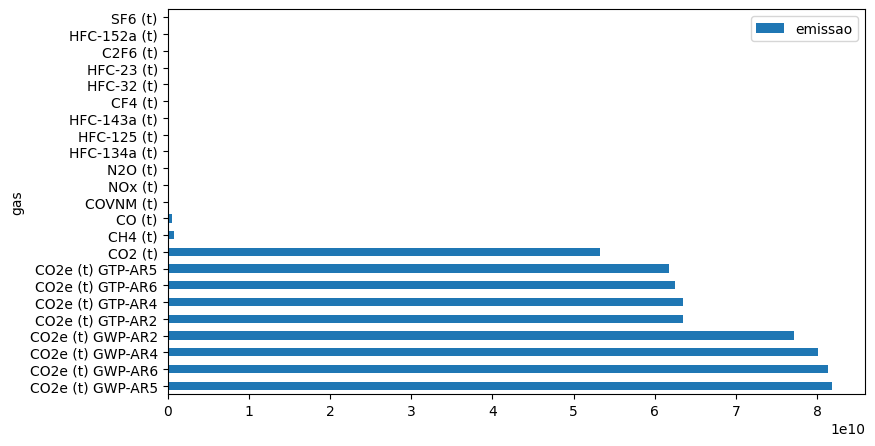

In [ ]:
emissao_total_gas.plot(kind='barh', figsize=(9,5));

Observando o gráfico fica claro que a maior parte das emissões é devido ao CO2, então vamos calcular esse percentual em relação ao total.

In [49]:
gases_co2 = [i for i in emissao_total_gas.index if 'co2' in i.lower()] # seleciona gases de CO2
gases_co2

['CO2e (t) GWP-AR5',
 'CO2e (t) GWP-AR6',
 'CO2e (t) GWP-AR4',
 'CO2e (t) GWP-AR2',
 'CO2e (t) GTP-AR2',
 'CO2e (t) GTP-AR4',
 'CO2e (t) GTP-AR6',
 'CO2e (t) GTP-AR5',
 'CO2 (t)']

In [50]:
emissao_total_gas.loc[gases_co2]

,emissao
gas,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


In [51]:
# contabiliza quantidade total, acessando os valores de formas diferentes
emissao_co2   = emissao_total_gas.loc[gases_co2].sum()['emissao']
emissao_total = emissao_total_gas.sum()[0]

emissao_co2, emissao_total

(624941266633.5209, 626593892045.2014)

In [ ]:
emissao_co2 / emissao_total

0.9973625255007093

In [ ]:
f"{(emissao_co2 / emissao_total) * 100:.2f}" # CO2 corresponde a 99,74% de toda emissao

'99.74'

#### Como funciona o `groupby()`

O agrupamento de dados é uma aplicação muito utilizada para encontrar medidas resumidas e ter um entendimento maior dos dados. Com a biblioteca pandas, é possível utilizar o método [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html), que é um processo que ocorre através de diferentes etapas conhecidas como _split-apply-combine_ ou dividir, aplicar e combinar, em português.

A etapa **dividir** consiste basicamente em separar o conjunto de dados em diferentes tabelas, uma para cada grupo. Os grupos são gerados a partir das categorias de uma ou mais colunas da tabela com base na informação que desejamos agrupar. Nesta etapa, podemos visualizar os grupos formados com o atributo [`groups`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.groups.html) e visualizar os dados de um grupo específico a partir do método [`get_group()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.get_group.html).

Já a etapa **aplicar** se refere ao momento de utilizar uma função matemática nos dados de cada grupo separadamente. Se o desejo for encontrar o valor total de cada grupo, então a soma será aplicada a cada grupo; se quisermos o valor médio, a função média será aplicada a cada grupo, e assim por diante. Existem diversas funções que podem ser aplicadas e cada uma dependerá do objetivo de análise dos dados:

- `mean()`: calcula a média dos grupos
- `sum()`: calcula a soma dos valores do grupo
- `size()`: calcula tamanhos de grupo
- `count()`: calcula a contagem do grupo
- `std()`: desvio padrão de grupos
- `var()`: calcula a variação de grupos
- `sem()`: erro padrão da média dos grupos
- `describe()`: gera estatísticas descritivas
- `first()`: calcula o primeiro dos valores do grupo
- `last()`: calcula o último dos valores do grupo
- `nth()`: pega o n-ésimo valor do grupo
- `min()`: calcula o mínimo de valores do grupo
- `max()`: calcula o máximo de valores do grupo

Por fim, a etapa **combinar** consiste em juntar todas as informações de agregação de cada grupo em uma única tabela, contendo o resumo das informações. A partir dela e com o resultado final, é possível extrair insights a partir dos dados e fazer comparações dos resultados entre cada grupo.

## 3 Agrupamentos multi-index

### Emissão de gases por setor

Agora vamos em busca de duas informações:

- Descobrir quais são os setores mais poluentes para cada gás;
- Descobrir quais são os gases mais poluentes para cada setor.

Vamos iniciar essa análise gerando um DataFrame agrupado, mas agora não vamos agrupar os dados como feito anteriormente, em torno de um único índice, o campo `gas`. Agora vamos agrupar os dados em torno de duas colunas: `gas` e `nivel_1_setor`. Vamos aproveitar e já somar a quantidade de emissão.

O resultado será um DataFrame multi-index, ou seja, cada índice que identifica uma linha é formado por mais de uma **informação**. No caso temos duas informações no índice, `gas` (nível 0 de informação do índice) e `nivel_1_setor` (nível 1 de informação do índice).

In [56]:
df_gas_setor = df.groupby(['gas', 'nivel_1_setor'])[['emissao']].sum()
df_gas_setor.head()

emissao
gas      nivel_1_setor                                   
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.429034e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07

Podemos acessar os valores de cada nível de informação do índice através da função `pd.MultiIndex.get_level_values(level)`, que retorna todos os valores do nível passado.

In [53]:
print(len(df_gas_setor.index.get_level_values(0)))
print(df_gas_setor.index.get_level_values(0)[:5])
print(len(set(df_gas_setor.index.get_level_values(0))))
print(list(set(df_gas_setor.index.get_level_values(0)))[:5])

72
Index(['C2F6 (t)', 'CF4 (t)', 'CH4 (t)', 'CH4 (t)', 'CH4 (t)'], dtype='object', name='gas')
23
['CO2e (t) GWP-AR4', 'N2O (t)', 'SF6 (t)', 'CF4 (t)', 'HFC-125 (t)']


In [54]:
set(df_gas_setor.index.get_level_values(0))

{'C2F6 (t)',
 'CF4 (t)',
 'CH4 (t)',
 'CO (t)',
 'CO2 (t)',
 'CO2e (t) GTP-AR2',
 'CO2e (t) GTP-AR4',
 'CO2e (t) GTP-AR5',
 'CO2e (t) GTP-AR6',
 'CO2e (t) GWP-AR2',
 'CO2e (t) GWP-AR4',
 'CO2e (t) GWP-AR5',
 'CO2e (t) GWP-AR6',
 'COVNM (t)',
 'HFC-125 (t)',
 'HFC-134a (t)',
 'HFC-143a (t)',
 'HFC-152a (t)',
 'HFC-23 (t)',
 'HFC-32 (t)',
 'N2O (t)',
 'NOx (t)',
 'SF6 (t)'}

In [55]:
set(df_gas_setor.index.get_level_values(1))

{'Agropecuária',
 'Energia',
 'Mudança de Uso da Terra e Floresta',
 'Processos Industriais',
 'Resíduos '}

#### DataFrames _multi-index_

Um [DataFrame _multi-index_](https://pandas.pydata.org/docs/user_guide/advanced.html#) é uma estrutura de dados em pandas que permite a criação de um índice hierárquico, isto é, com um índice que possui múltiplos níveis. Isso permite a organização dos dados de maneira mais detalhada do que um índice simples e pode ser verificado no exemplo abaixo de um DataFrame multi index, no qual as duas primeiras colunas representam os 2 níveis do index:

&nbsp;||emissao
-|-|-
**gas**|**nivel_1_setor**|
**C2F6 (t)**|**Processos industriais**|576
**CF4 (t)**|**Processos industriais**|7135
**CH4 (t)**|**Agropecuária**|592848100
|**Energia**|34290340
|**Mudança de Uso da Terra e Floresta**|86621660
**NOx (t)**|**Agropecuária**|2602719
|**Energia**|93612150
|**Processos industriais**|3546360

A hierarquia dos índices é da esquerda para a direita, portanto o índice "Gás" ocupa o _level_ 0 de hierarquia e o índice "Nível 1 - Setor" ocupa o _level_ 1 de hierarquia. A seleção de dados a partir dos índices nesse tipo de DataFrame se torna um pouco diferente de um convencional. Podemos usar o método `loc` para selecionar os dados do primeiro level de forma direta. Logo, para selecionar as informações do gás "CH4", é possível utilizar o código:

```python
dados.loc['CH4 (t)']
```

Também é possível especificar valores para todos os níveis de índice passando uma tupla para o método `loc`. Para selecionar a emissão de "Agropecuária" do gás "CH4", podemos usar a tupla ('CH4 (t)', 'Agropecuária'), mantendo a ordem dos níveis:

```python
dados.loc[('CH4 (t)', 'Agropecuária')]
```

Já para selecionar valores específicos de algum dos níveis do índice, é preciso utilizar o método `xs()`, conhecido como cross-section. Com ele, há a possibilidade de selecionar um valor de um nível de hierarquia sem a necessidade de indicar a tupla desde o primeiro level. Para selecionar os valor "Agropecuária" na tabela, podemos usar o código:

```python
dados.xs('Agropecuária', level = 1)
```

### Selecionando dados com método _cross-section_ `xs()`

Vamos começar a responder a primeira pergunta para um dos gases, descobrir qual é o setor que emite a maior quantidade de CO2. Para isso podemos realizar uma seleção específica do gás `'CO2 (t)'` com o uso do método _cross-section_ [`xs()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html), que irá retornar um DataFrame apenas com linhas que correspondem ao gás `'CO2 (t)'`.

In [ ]:
df_gas_setor.xs('CO2 (t)', level=0) # DataFrame apenas com linhas que correspondem ao gas CO2

,emissao
nivel_1_setor,
Agropecuária,5.411750e+08
Energia,1.261352e+10
Mudança de Uso da Terra e Floresta,3.733930e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07


In [ ]:
# selecionando exatamente o gas CO2 e o setor 'mudanca de uso da terra e floresta', note a ordem dos valores na tupla e na lista de levels
df_gas_setor.xs(('CO2 (t)','Mudança de Uso da Terra e Floresta'), level=[0,1])

,,emissao
gas,nivel_1_setor,
CO2 (t),Mudança de Uso da Terra e Floresta,3.733930e+10


A partir disso podemos extrair o valor máximo e índice máximo com os métodos [`max()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html) e [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html?highlight=idxmax#pandas.DataFrame.idxmax)

In [ ]:
df_gas_setor.xs('CO2 (t)', level=0).max() # valor maximo

emissao    3.733930e+10
dtype: float64

In [ ]:
df_gas_setor.xs('CO2 (t)', level=0).idxmax() # indice (nivel 1) do valor maximo

emissao    Mudança de Uso da Terra e Floresta
dtype: object

### Obtendo valores máximos

Para evitar de fazer isso para cada tipo de gás, podemos explorar ainda mais o método `groupby()` em conjunto com o [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.idxmax.html?highlight=idxmax#pandas.core.groupby.DataFrameGroupBy.idxmax).

Vamos voltar ao DataFrame _multi-index_ e agrupá-lo novamente, agora em torno do nível 0 de informação do índice e aplicar o método `idxmax()`. Isso vai resultar em um DataFrame com o índice que corresponde ao valor máximo de emissão para cada gás, ou seja, qual é o setor que mais emite cada gás.

In [57]:
df_gas_setor.groupby(level=0).idxmax().head() # setores com maior emissao para cada gas

,emissao
gas,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"


Note que no DataFrame acima não há a quantidade de emissão correspondente. Então agora vamos criar uma tabela sumarizada com as informações dos valores máximos de emissão para cada tipo de gás e com a referência do setor com maior emissão de cada gás.

In [58]:
df_gas_setor.groupby(level=0).max().head() # valores maximos de emissao por gas

,emissao
gas,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),5.928481e+08
CO (t),3.959769e+08
CO2 (t),3.733930e+10


In [59]:
valores_max = df_gas_setor.groupby(level=0).max().values # array apenas com os valores mesmo
print(len(valores_max))
valores_max[:5]

23


array([[5.76501774e+02],
       [7.13548128e+03],
       [5.92848132e+08],
       [3.95976946e+08],
       [3.73393003e+10]])

In [60]:
tabela_sumarizada = df_gas_setor.groupby(level=0).idxmax()
tabela_sumarizada.insert(loc=1, column='qtd_emissao', value=valores_max)
tabela_sumarizada['qtd_emissao2'] = valores_max
tabela_sumarizada.head()

,emissao,qtd_emissao,qtd_emissao2
gas,,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02,5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03,7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08,5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08,3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10,3.733930e+10


In [61]:
# ou deixando o DataFrame mais bonitinho
tabela_sumarizada = df_gas_setor.groupby(level=0).idxmax()
tabela_sumarizada.insert(loc=0, column='setor_economia', value=tabela_sumarizada['emissao'].apply(lambda x: x[1]))
tabela_sumarizada['emissao'] = valores_max
tabela_sumarizada.head()

,setor_economia,emissao
gas,,
C2F6 (t),Processos Industriais,5.765018e+02
CF4 (t),Processos Industriais,7.135481e+03
CH4 (t),Agropecuária,5.928481e+08
CO (t),Energia,3.959769e+08
CO2 (t),Mudança de Uso da Terra e Floresta,3.733930e+10


A segunda pergunta é em relação aos setores, sobre qual gás possui a maior emissão em cada setor, e para isso basta trocar o nível agrupado nos passos anteriores (e mais uns "ajustezinhos").

In [62]:
tabela_sumarizada = df_gas_setor.groupby(level=1).idxmax()
tabela_sumarizada.insert(loc=0, column='gas', value=tabela_sumarizada['emissao'].apply(lambda x: x[0]))
tabela_sumarizada['emissao'] = df_gas_setor.groupby(level=1).max().values
tabela_sumarizada.head()

,gas,emissao
nivel_1_setor,,
Agropecuária,CO2e (t) GWP-AR5,2.184388e+10
Energia,CO2e (t) GWP-AR6,1.385259e+10
Mudança de Uso da Terra e Floresta,CO2e (t) GWP-AR5,4.051523e+10
Processos Industriais,CO2e (t) GWP-AR6,3.352064e+09
Resíduos,CO2e (t) GWP-AR5,2.310099e+09


Podemos também alterar a ordem dos níveis de índice para encontrar essa outra informação, que nos diz qual o gás mais emitido para cada tipo de setor. Para isso, vamos utilizar o método [`swaplevel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.swaplevel.html).

In [63]:
df_gas_setor.swaplevel(0, 1).head()

emissao
nivel_1_setor                      gas                   
Processos Industriais              C2F6 (t)  5.765018e+02
                                   CF4 (t)   7.135481e+03
Agropecuária                       CH4 (t)   5.928481e+08
Energia                            CH4 (t)   3.429034e+07
Mudança de Uso da Terra e Floresta CH4 (t)   8.662166e+07

In [64]:
# df_gas_setor.swaplevel(0, 1).groupby(level=0).idxmax()
tabela_sumarizada = df_gas_setor.swaplevel(0, 1).groupby(level=0).idxmax()
tabela_sumarizada.insert(loc=0, column='gas', value=tabela_sumarizada['emissao'].apply(lambda x: x[1]))
tabela_sumarizada['emissao'] = df_gas_setor.swaplevel(0, 1).groupby(level=0).max().values
tabela_sumarizada.head()

,gas,emissao
nivel_1_setor,,
Agropecuária,CO2e (t) GWP-AR5,2.184388e+10
Energia,CO2e (t) GWP-AR6,1.385259e+10
Mudança de Uso da Terra e Floresta,CO2e (t) GWP-AR5,4.051523e+10
Processos Industriais,CO2e (t) GWP-AR6,3.352064e+09
Resíduos,CO2e (t) GWP-AR5,2.310099e+09


### Emissão ao longo dos anos

Vamos identificar se as emissões de gases estufas aumentaram ou diminuíram ao longo dos anos, visualizando essa variação para cada tipo de gás emitido separadamente.

Para criar um gráfico da emissão média ao longo dos anos precisamos dessas duas informações: a quantidade média que foi emitida a cada ano. Como temos variás linhas para cada ano, precisamos fazer um agrupamento em torno do campo `ano`. Note que dessa forma, não estamos fazendo qualquer consideração quanto o tipo de gás ou o setor da atividade econômica

In [65]:
df.head()

,nivel_1_setor,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,gas,estado,atividade_economica,produto,ano,emissao
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0


In [66]:
df.groupby('ano')[['emissao']].mean().head()

,emissao
ano,
1970,22127.818644
1971,23651.134813
1972,25177.219717
1973,27475.521366
1974,29196.398182


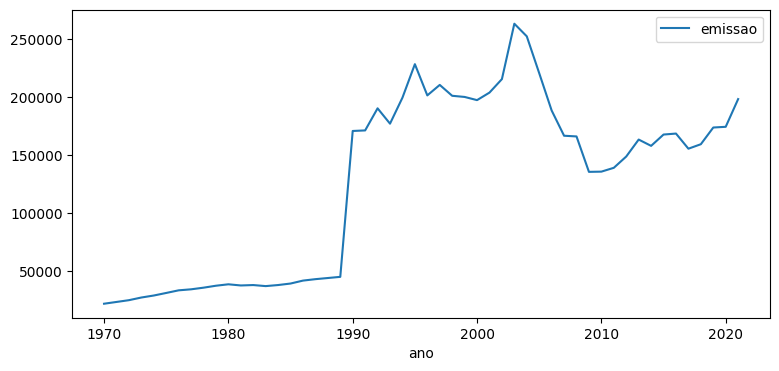

In [67]:
a = df.groupby('ano')[['emissao']].mean().plot(figsize=(9, 4))

Note que pouco antes do ano 1990 ocorre um crescimento abrupto na emissão média por ano. Isso pode ser explicado por termos dados do setor 'Mudança de Uso da Terra e Floresta' apenas a partir do ano 1990.

In [68]:
df.query('emissao > 0').groupby('nivel_1_setor')[['ano']].min()

,ano
nivel_1_setor,
Agropecuária,1970
Energia,1970
Mudança de Uso da Terra e Floresta,1990
Processos Industriais,1970
Resíduos,1970


In [69]:
df.groupby('ano')[['emissao']].mean().idxmax() # indice do ponto maximo, ou seja, ano com a maior emissao media

emissao    2003
dtype: object

Como estamos interessados em visualizar a emissão média ao longo dos anos para cada gás, vamos começar fazendo um agrupamento _multi_inde_ em torno dos campos `gas` e `ano`.

In [70]:
df.query('emissao > 0').groupby(['ano', 'gas'])[['emissao']].mean().head()

emissao
ano  gas                    
1970 C2F6 (t)       0.697831
     CF4 (t)       10.672263
     CH4 (t)     8804.721466
     CO (t)     52804.184720
     CO2 (t)   472569.535217

Note que temos `'ano'` como a informação de nível 0 do índice e `'gas'` como nível 1. A forma mais simples de plotar uma curva para cada gas é fazendo com que cada gás esteja em uma coluna, e mantendo em cada linha a quantidade de emissão de um ano.

Vamos começar resetando o índice do DataFrame acima, mantendo os antigos índices como colunas.

In [71]:
df_emissao_ano = df.query('emissao > 0').groupby(['ano', 'gas'])[['emissao']].mean().reset_index()
df_emissao_ano.head()

,ano,gas,emissao
0,1970,C2F6 (t),0.697831
1,1970,CF4 (t),10.672263
2,1970,CH4 (t),8804.721466
3,1970,CO (t),52804.184720
4,1970,CO2 (t),472569.535217


Agora vamos "pivotar" a coluna `'gas'`, ou seja, vamos transpor cada um de seus valores únicos para uma coluna. Note que esse é o processo para converter uma do formato _long_ para _wide_. Para isso, usamos o método `pivot_table()`, passando os parâmetros para indicar:

- qual coluna será o novo índice
- qual será a coluna transformada
- e qual é a coluna com os valores.

In [72]:
df_emissao_ano = df_emissao_ano.pivot_table(index='ano', columns='gas', values='emissao')
df_emissao_ano.head()

gas,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
ano,,,,,,,,,,,,,,,,,,,,,
1970,0.697831,10.672263,8804.721466,52804.184720,472569.535217,73745.288370,73745.288370,67870.658378,70040.217741,125366.417102,...,20839.012749,NaN,NaN,NaN,NaN,NaN,NaN,103.119845,3706.523421,NaN
1971,1.003832,15.352079,8618.327718,55353.543104,491367.871145,77371.706088,77371.706088,71455.745854,73651.903007,129390.799598,...,20503.268474,NaN,NaN,NaN,NaN,NaN,NaN,106.011358,4102.919145,NaN
1972,1.214052,18.567075,8942.605158,58876.496068,530563.727837,82898.004954,82898.004954,76716.571565,78999.069002,136903.008308,...,21582.305100,NaN,NaN,NaN,NaN,NaN,NaN,111.485309,4514.731251,NaN
1973,1.389442,21.249408,9269.295825,63187.285137,621639.951867,91784.565199,91784.565199,85397.887365,87768.989940,147727.724122,...,22211.912884,NaN,NaN,NaN,NaN,NaN,NaN,114.626697,5195.189595,NaN
1974,1.413077,21.610858,9531.925224,62848.567444,647933.425266,97376.201488,97376.201488,90760.885412,93219.722008,155011.464288,...,27346.999979,NaN,NaN,NaN,NaN,NaN,NaN,119.424275,5701.993315,NaN


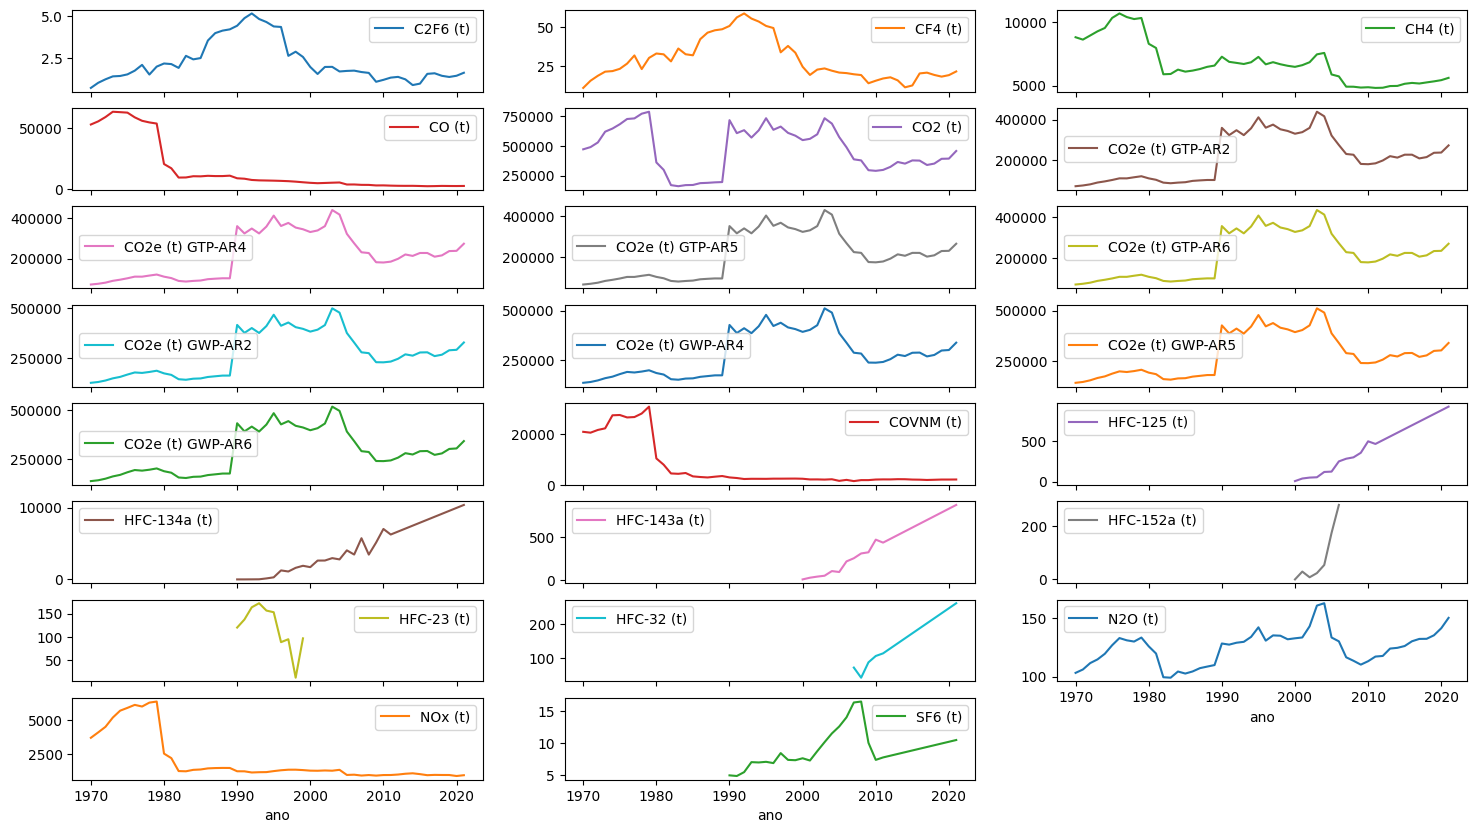

In [73]:
df_emissao_ano.plot(subplots=True, figsize=(18, 10), layout=(8,3));

## 4 Unindo dados

### População dos estados

> Existe uma métrica muito importante para avaliar a emissão de gases estufa: a emissão per capita. Ela é obtida a partir da divisão da **emissão total** pela **população** de determinada região.

    Emissão per capita = emissão total / população

Para encontrar essa informação, é necessário importar uma nova base de dados com a população de cada estado do Brasil. Vamos utilizar os dados populacionais dos municípios do Brasil, disponíveis a partir do [censo 2022](https://www.ibge.gov.br/estatisticas/sociais/saude/22827-censo-demografico-2022.html?=&t=resultados) no site do IBGE, ou na planilha Excel no [link](https://caelum-online-public.s3.amazonaws.com/2927-pandas-selecao-agrupamento-dados/POP2022_Municipios.xls) da Alura.

#### Carregando os dados populacionais por município

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/POP2022_Municipios.xls'
pd.ExcelFile(file_path).sheet_names # paginas existentes na planilha

['Municípios']

In [ ]:
df_pop = pd.read_excel(file_path, sheet_name='Municípios') # carrega dados da pagina de intesse
print(df_pop.shape)
df_pop.head()

(5605, 5)


,Prévia da população calculada com base nos resultados do Censo Demográfico 2022 até 25 de dezembro de 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
1,RO,11,00015,Alta Floresta D'Oeste,21558
2,RO,11,00023,Ariquemes,100896
3,RO,11,00031,Cabixi,5107
4,RO,11,00049,Cacoal,92202


In [ ]:
df_pop.columns

Index(['Prévia da população calculada com base nos resultados do Censo Demográfico 2022 até 25 de dezembro de 2022',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')

In [ ]:
df_pop.tail()

,Prévia da população calculada com base nos resultados do Censo Demográfico 2022 até 25 de dezembro de 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
5600,(26) População judicial do município Coronel J...,NaN,NaN,NaN,NaN
5601,(27) População judicial do município Ibiassucê...,NaN,NaN,NaN,NaN
5602,(28) População judicial do município de Rodela...,NaN,NaN,NaN,NaN
5603,(29) População judicial do Município de Ribeir...,NaN,NaN,NaN,NaN
5604,(30) População judicial do Município de Planal...,NaN,NaN,NaN,NaN


In [ ]:
df_pop.tail(50).head()

,Prévia da população calculada com base nos resultados do Censo Demográfico 2022 até 25 de dezembro de 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
5555,GO,52,21304,Três Ranchos,2906
5556,GO,52,21403,Trindade,149167
5557,GO,52,21452,Trombas,3123
5558,GO,52,21502,Turvânia,4462
5559,GO,52,21551,Turvelândia,4847


Após carregar o arquivo e inspecionar as primeiras e últimas linhas, notamos algo um pouco estranho. Perceba que as colunas possuem rótulos genéricos e ao final do arquivo apenas uma coluna possui conteúdo.

Se abrirmos o arquivo no Excel, veremos que a primeira linha contém o texto

> "_Prévia da população calculada com base nos resultados do Censo  Demográfico 2022 até 25 de dezembro de 2022_"

ou seja, a primeira linha é apenas uma descrição da base e seu conteúdo não faz parte dos dados. Assim como as últimas 34 linhas, que trazem a informação da fonte de origem dos dados e algumas notas/legendas.

Para carregar os dados do arquivo sem trazer essas linhas, devemos passar alguns paramêtros para a função `read_csv()`, são eles:

- `header`: indica o índice da linha em que a leitura deve começar. O valor padrão é `0`, então, para pular a primeira linha do arquivo e começar a carregar a partir da segunda, passamos o valor `1`
- `skipfooter`: indica a quantidade de linhas ao final do arquivo que queremos pular

In [3]:
df_pop = pd.read_excel(file_path, sheet_name='Municípios', header=1, skipfooter=34) # carrega dados da pagina de intesse
print(df_pop.shape)
df_pop.head()

(5570, 5)


,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237


In [ ]:
df_pop.tail()

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
5565,GO,52,22005,Vianópolis,14046
5566,GO,52,22054,Vicentinópolis,8776
5567,GO,52,22203,Vila Boa,3686
5568,GO,52,22302,Vila Propício,5646
5569,DF,53,108,Brasília,2923369


In [12]:
# # !pip install unidecode
from unidecode import unidecode
import re

df_pop.columns = [re.sub('\s+', ' ', unidecode(i).replace('.', '')).replace(' ', '_') for i in df_pop.columns.str.lower()]
df_pop.columns

Index(['uf', 'cod_uf', 'cod_munic', 'nome_do_municipio', 'populacao'], dtype='object')

#### Agrupando os dados por UF

Como as informações são referentes aos municípios, vamos realizar uma agregação com base na coluna estado.

In [ ]:
df_pop.groupby('UF').sum(numeric_only=True).head()

,COD. UF,COD. MUNIC
UF,,
AC,264,7719
AL,2754,487914
AM,806,134451
AP,256,5908
BA,12093,7151757


In [ ]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UF                 5570 non-null   object
 1   COD. UF            5570 non-null   int64 
 2   COD. MUNIC         5570 non-null   int64 
 3   NOME DO MUNICÍPIO  5570 non-null   object
 4   POPULAÇÃO          5570 non-null   object
dtypes: int64(2), object(3)
memory usage: 217.7+ KB


Percebemos que a informação da `POPULAÇÃO` não foi agregada pois está em formato de texto, portanto será necessário transformar converter essa coluna para o tipo inteiro para que seja possível somar seu conteúdo.

In [ ]:
# # converte coluna para tipo inteiro
# df_pop['populacao'].astype(int) # ValueError: invalid literal for int() with base 10: '461.748(1)'

Recebemos um erro informando que existe um valor que não pode ser feito o _casting_ para o tipo `int`, isso ocorre devido a presença de caracteres de texto que não representa um caracter de número: o parênteses `(`, `)` e `.`.

Então vamos procurar por mais linhas em que isso pode acontecer, para definir a melhor forma de lidar com isso. Para procurar um texto no DataFrame vamos usar o método `contains()`:

In [13]:
df_pop['populacao'].str.contains('\(', na=False).sum()

30

In [ ]:
df_pop[df_pop['populacao'].str.contains('\(', na=False)].head()

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)


#### Tratando os dados

Vamos utilizar o método `replace()` para substituir os caractéres "problemáticos" e o método `assign()` para criar uma coluna no DataFrame de visualização, selecionando apenas a coluna original (sendo modificada) e a nova.

In [28]:
df_pop[df_pop['populacao'].str.contains('\(', na=False)].assign(
    populacao_tratada = df_pop[df_pop['populacao'].str.contains('\(', na=False)].populacao.replace("(\(\d{1,2}\))|(\.)", "", regex=True)
)[['populacao', 'populacao_tratada']].head()

,populacao,populacao_tratada
16,461.748(1),461748
74,15.916(2),15916
81,18.399(3),18399
83,37.436(4),37436
87,33.209(5),33209


In [30]:
df_pop['populacao'] = df_pop.populacao.replace("(\(\d{1,2}\))|(\.)", "", regex=True)
df_pop['populacao'].str.contains('\(', na=False).sum()

0

Agora podemos converter a coluna `populacao` para o tipo `int`.

In [34]:
df_pop = df_pop.astype({'populacao': 'int64'})
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   uf                 5570 non-null   object
 1   cod_uf             5570 non-null   int64 
 2   cod_munic          5570 non-null   int64 
 3   nome_do_municipio  5570 non-null   object
 4   populacao          5570 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 217.7+ KB


E finalmente, agrupamos os dados por `uf`, somando a a população total de cada estado e resetamos o índice do DataFrame, para termos todas as informações de interesse em colunas:

In [39]:
df_pop_uf = df_pop.groupby('uf')[['populacao']].sum().reset_index()
print(df_pop_uf.shape)
df_pop_uf.head()

(27, 2)


,uf,populacao
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023


### Unindo os dados

Já temos os dados tratados da população de cada estado, mas ainda precisamos consolidar os dados de emissão por estado, para calcular a emissão percapita de cada estado. Vamos nos ater apenas ao último ano disponível, gerando um DataFrame com _layout_ similar ao que já temos, com o identificador do estado em uma coluna e a quantidade de emissao em outra.

In [85]:
df.head(2)

,nivel_1_setor,nivel_2,nivel_3,nivel_4,nivel_5,...,estado,atividade_economica,produto,ano,emissao
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,...,SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,...,SP,OUTRA_IND,NaN,1970,6210.0


In [78]:
df.ano.max() # ultimo ano disponivel

'2021'

In [87]:
# df.query("ano == 2021").shape # retorna (0, 12)
# df.query("ano == '2021'").shape # (94748, 12)
df_emissao_uf = df.query("ano == '2021'").groupby('estado')[['emissao']].sum().reset_index()
print(df_emissao_uf.shape)
df_emissao_uf.head()

(27, 2)


,estado,emissao
0,AC,3.505471e+08
1,AL,6.261279e+07
2,AM,1.189649e+09
3,AP,3.568410e+07
4,BA,5.932251e+08


Com as informações tratadas, podemos realizar a junção dos dados de emissão com a população usando o método [`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) e as colunas `uf` e `estado` como chave de junção.

In [89]:
df_uf = pd.merge(df_emissao_uf, df_pop_uf, left_on='estado', right_on='uf')
print(df_uf.shape)
df_uf.head()

(27, 4)


,estado,emissao,uf,populacao
0,AC,3.505471e+08,AC,829780
1,AL,6.261279e+07,AL,3125254
2,AM,1.189649e+09,AM,3952262
3,AP,3.568410e+07,AP,774268
4,BA,5.932251e+08,BA,14659023


In [92]:
df_uf = df_uf[['uf', 'emissao', 'populacao']]
df_uf.head()

,uf,emissao,populacao
0,AC,3.505471e+08,829780
1,AL,6.261279e+07,3125254
2,AM,1.189649e+09,3952262
3,AP,3.568410e+07,774268
4,BA,5.932251e+08,14659023


Vamos verificar se há alguma relação entre o aumento da população com o aumento das emissões em cada estado, para isso vamos construir um gráfico de dispersão (_scatter plot_) com as informações de **emissão** e **população**.

<Axes: xlabel='populacao', ylabel='emissao'>

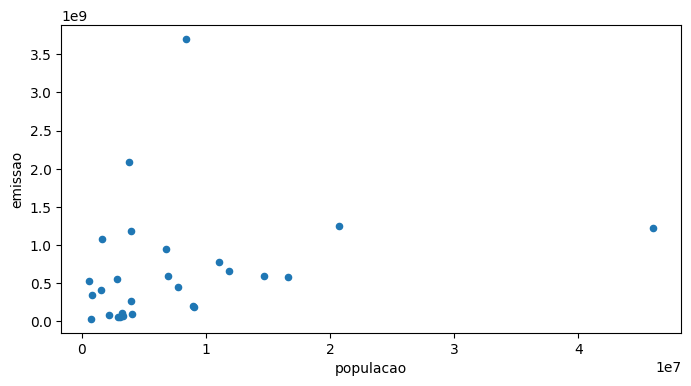

In [93]:
df_uf.plot(x='populacao', y='emissao', kind='scatter', figsize=(8, 4))

Se quisermos saber a informação de cada estado nos pontos do gráfico, podemos utilizar uma outra biblioteca para obter um gráfico mais elaborado.

In [99]:
import plotly.express as px

px.scatter(data_frame=df_uf, x='populacao', y='emissao', text='uf', opacity=0)

Para obtermos a emissão per capita, criaremos uma nova coluna com a divisão dos valores de emissão pela população de cada estado.

In [101]:
df_uf['emissao_per_capita'] = df_uf.emissao / df_uf.populacao
df_uf.head()

,uf,emissao,populacao,emissao_per_capita
0,AC,3.505471e+08,829780,422.457928
1,AL,6.261279e+07,3125254,20.034465
2,AM,1.189649e+09,3952262,301.004463
3,AP,3.568410e+07,774268,46.087533
4,BA,5.932251e+08,14659023,40.468254


In [103]:
df_uf = df_uf.sort_values('emissao_per_capita', ascending=False).reset_index(drop=True)
df_uf.head()

,uf,emissao,populacao,emissao_per_capita
0,RR,5.282071e+08,634805,832.077694
1,RO,1.083515e+09,1616379,670.334662
2,MT,2.081610e+09,3784239,550.073647
3,PA,3.701684e+09,8442962,438.434230
4,AC,3.505471e+08,829780,422.457928


Podemos gerar representações gráficas para termos uma melhor ideia de quais são os estados com as maiores emissões per capita. Vamos plotar um gráfico de barras primeiro e depois novamente o gráfico de dispersão, mas dessa vez vamos trocar os pontos por "bolhas" que terão o tamanho proporcional à emissão per capita.

In [104]:
px.bar(data_frame=df_uf, x='uf', y='emissao_per_capita')

In [105]:
px.scatter(data_frame=df_uf, x='populacao', y='emissao', text='uf', size='emissao_per_capita')

#### Métodos de junção

A biblioteca Pandas oferece várias ferramentas para trabalhar com DataFrames, incluindo a capacidade de combinar, juntar e mesclá-los. Essas operações são úteis para combinar dados de diferentes fontes em um único DataFrame. Existem três principais métodos de união de DataFrames em pandas: `concat`, `join` e `merge`.

- `concat`

A concatenação é um método simples para combinar DataFrames, no qual suas colunas e índices são mantidos e os valores são simplesmente concatenados uns sobre os outros. Permite que você concatene DataFrames verticalmente (um acima do outro) ou horizontalmente (lado a lado).

```python
pd.concat([df1, df2, ...], axis=0/1)
```

No qual, `axis` é o eixo do qual a concatenação vai acontecer. Se `axis=0`, a concatenação ocorre ao longo do eixo vertical (empilhamento). Se `axis=1`, a concatenação ocorre ao longo do eixo horizontal (lado a lado).

- `join`

O método `join` é usado para unir dois DataFrames com base em suas colunas de índice ou uma coluna de nome especificada. Ele pode ser usado para unir DataFrames com as mesmas colunas ou com colunas diferentes.

Os dois DataFrames precisam ter uma coluna com nome em comum ou possuírem os índices contendo o mesmo tipo de informação, caso a união ocorra pelo índice e não usando alguma coluna.

```python
df1.join(df2, on='nome_coluna', how='left')
```

No qual `on` é o nome da coluna em comum entre os dois DataFrames usada como chave de junção. Caso não seja utilizado nenhum valor, a união será feita com base nos índices dos DataFrames. O parâmetro `how` é o tipo de junção a ser realizada, podendo ser `'left'`, `'right'`, `'inner'` ou `'outer'`.

- `merge`

O método `merge` é o método mais completo para unir dois DataFrames com base em seus índices ou em colunas de ligação.

```python
df1.merge(df2, on=None, how='inner', left_on='nome_coluna_df1', right_on='nome_coluna_df2')
```

Nela, o `on` é o nome da coluna nos dois DataFrames, caso seja o mesmo nome. O parâmetro `how` é o tipo de junção a ser realizada, podendo ser `'left'`, `'right'`, `'inner'`, `'outer'` ou `'cross'`. Os parâmetros `left_on` e `right_on` são respectivamente os nomes das colunas do `df1` e `df2`, caso tenham nomes diferentes.